In [1]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from config import weather_api_key


In [3]:
import requests
requests.__version__

'2.24.0'

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
#england = "london"
#lond_url = "http://api.openweathermap.org/data/2.5/weather?q=" + england + "&units=imperial" + "&appid=" + weather_api_key
#london_url


In [8]:

#list_url =  "http://api.openweathermap.org/data/2.5/weather?q=" + cities[5].replace(" ", "+") + "&units=imperial" + "&appid=" + weather_api_key


In [9]:
# Starting URL for Weather Map API Call.
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
#print(url)

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city.replace(" ", "+") + "&units=imperial" + "&appid=" + weather_api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pasni
Processing Record 2 of Set 1 | antalaha
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | manga
Processing Record 6 of Set 1 | sao joao da barra
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | skagastrond
City not found. Skipping...
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | tawnat
City not found. Skipping...
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | xifeng
Processing Record 20 of Set 1 | beyla
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | vi

Processing Record 36 of Set 4 | chokurdakh
Processing Record 37 of Set 4 | ust-nera
Processing Record 38 of Set 4 | morant bay
Processing Record 39 of Set 4 | saint-michel-des-saints
Processing Record 40 of Set 4 | nome
Processing Record 41 of Set 4 | asyut
Processing Record 42 of Set 4 | cape town
Processing Record 43 of Set 4 | carhuaz
Processing Record 44 of Set 4 | saquarema
Processing Record 45 of Set 4 | yeppoon
Processing Record 46 of Set 4 | krasnoselkup
Processing Record 47 of Set 4 | kailua
Processing Record 48 of Set 4 | kankan
Processing Record 49 of Set 4 | oulu
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | boende
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | hualmay
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | bredasdorp
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | mataruska banja
Processing Record 8 of Set 5 | sigli
Processing Record 9 of Set 5 | port hedland
Processing Re

Processing Record 27 of Set 8 | mulchen
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | juneau
Processing Record 30 of Set 8 | abilene
Processing Record 31 of Set 8 | songea
Processing Record 32 of Set 8 | saint-augustin
Processing Record 33 of Set 8 | great yarmouth
Processing Record 34 of Set 8 | broken hill
Processing Record 35 of Set 8 | santa maria da vitoria
Processing Record 36 of Set 8 | tra vinh
Processing Record 37 of Set 8 | flin flon
Processing Record 38 of Set 8 | isangel
Processing Record 39 of Set 8 | marsaxlokk
Processing Record 40 of Set 8 | bereda
Processing Record 41 of Set 8 | ahuimanu
Processing Record 42 of Set 8 | ruwi
Processing Record 43 of Set 8 | phu ly
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | lumeje
Processing Record 46 of Set 8 | kosh-agach
Processing Record 47 of Set 8 | gararu
Processing Record 48 of Set 8 | athabasca
Processing Record 49 of Set 8 | daru
Processing Record 50 of Set 8 | corn 

Processing Record 17 of Set 12 | samarai
Processing Record 18 of Set 12 | kathmandu
Processing Record 19 of Set 12 | sabzevar
Processing Record 20 of Set 12 | mackay
Processing Record 21 of Set 12 | puri
Processing Record 22 of Set 12 | chimore
Processing Record 23 of Set 12 | berlevag
Processing Record 24 of Set 12 | garden city
Processing Record 25 of Set 12 | ormara
Processing Record 26 of Set 12 | ures
Processing Record 27 of Set 12 | ola
Processing Record 28 of Set 12 | forio
Processing Record 29 of Set 12 | bykovo
Processing Record 30 of Set 12 | conde
Processing Record 31 of Set 12 | ahar
Processing Record 32 of Set 12 | geraldton
Processing Record 33 of Set 12 | quatre cocos
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | yingcheng
Processing Record 36 of Set 12 | saldanha
Processing Record 37 of Set 12 | zalesovo
Processing Record 38 of Set 12 | asau
Processing Record 39 of Set 12 | batavia
Processing Record 40 of Set 12 | pljevlja
Processing Recor

In [11]:
len(city_data)

572

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pasni,25.2631,63.4710,81.37,63,36,15.90,PK,2021-04-19 19:57:53
1,Antalaha,-14.9003,50.2788,74.12,86,100,8.46,MG,2021-04-19 19:57:54
2,Barrow,71.2906,-156.7887,24.80,80,90,19.57,US,2021-04-19 19:53:25
3,Atuona,-9.8000,-139.0333,79.70,80,23,18.97,PF,2021-04-19 19:55:12
4,Manga,11.6636,-1.0731,93.47,29,95,12.21,BF,2021-04-19 19:57:54
5,Sao Joao Da Barra,-21.6403,-41.0511,82.40,65,20,11.50,BR,2021-04-19 19:56:26
6,Hilo,19.7297,-155.0900,78.80,65,90,6.91,US,2021-04-19 19:56:05
7,Ushuaia,-54.8000,-68.3000,44.60,87,75,4.61,AR,2021-04-19 19:54:11
8,Albany,42.6001,-73.9662,59.00,49,100,4.63,US,2021-04-19 19:51:45
9,Katsuura,35.1333,140.3000,55.40,47,20,4.61,JP,2021-04-19 19:54:22


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pasni,PK,2021-04-19 19:57:53,25.2631,63.4710,81.37,63,36,15.90
1,Antalaha,MG,2021-04-19 19:57:54,-14.9003,50.2788,74.12,86,100,8.46
2,Barrow,US,2021-04-19 19:53:25,71.2906,-156.7887,24.80,80,90,19.57
3,Atuona,PF,2021-04-19 19:55:12,-9.8000,-139.0333,79.70,80,23,18.97
4,Manga,BF,2021-04-19 19:57:54,11.6636,-1.0731,93.47,29,95,12.21
5,Sao Joao Da Barra,BR,2021-04-19 19:56:26,-21.6403,-41.0511,82.40,65,20,11.50
6,Hilo,US,2021-04-19 19:56:05,19.7297,-155.0900,78.80,65,90,6.91
7,Ushuaia,AR,2021-04-19 19:54:11,-54.8000,-68.3000,44.60,87,75,4.61
8,Albany,US,2021-04-19 19:51:45,42.6001,-73.9662,59.00,49,100,4.63
9,Katsuura,JP,2021-04-19 19:54:22,35.1333,140.3000,55.40,47,20,4.61


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

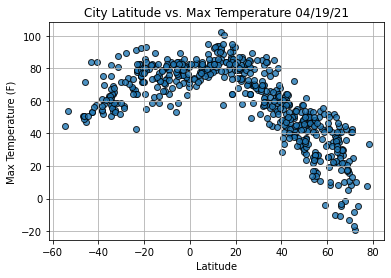

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

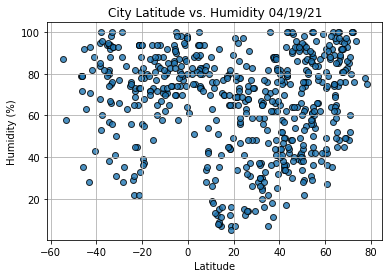

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

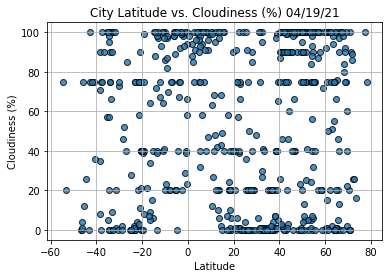

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

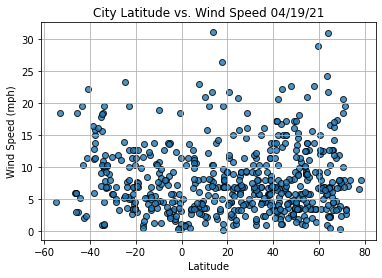

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

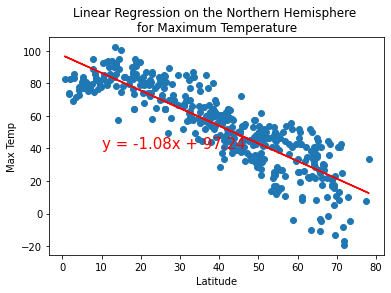

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

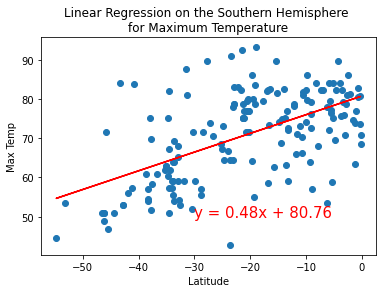

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-30,50))

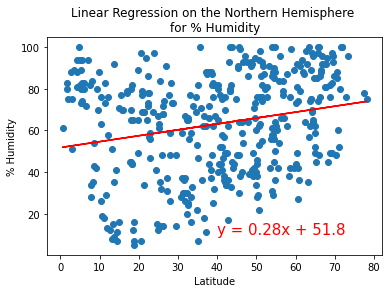

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

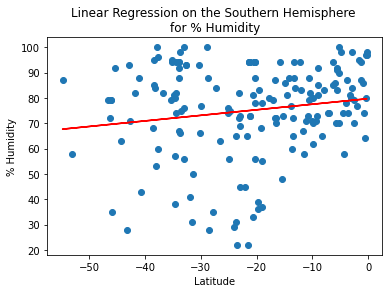

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

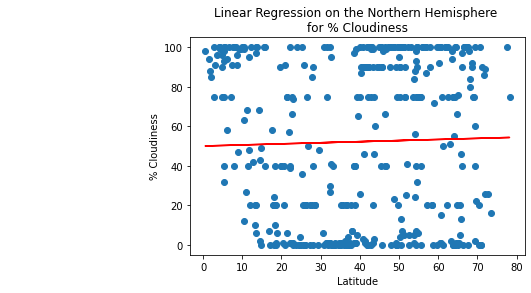

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

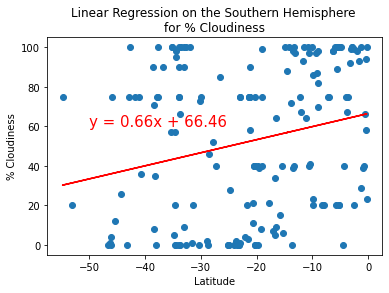

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

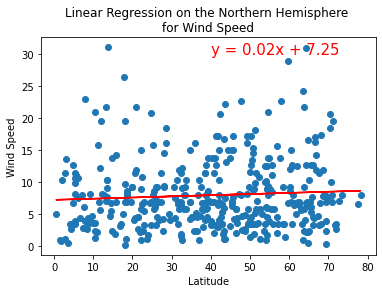

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,30))

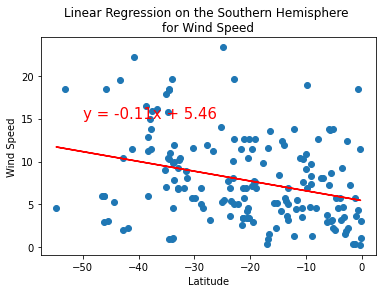

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,15))